## Student Id:24038688

# Part 2

### Task 6 - Explore the dataset to identify an "interesting" pattern or trend

In [10]:
import pandas as pd

part_2a = pd.read_csv('part_2a.csv')
part_2b = pd.read_csv('part_2b.csv')

mergedData = pd.merge(part_2a, part_2b, on='id_student')

data_range = (mergedData.groupby('final_result')['score']
              .agg(min_score='min', max_score='max')
              .sort_values(by='min_score'))

print(data_range)

              min_score  max_score
final_result                      
Fail                0.0      100.0
Withdrawn           0.0      100.0
Pass               27.0       99.0
Distinction        49.0      100.0


In [47]:
import pandas as pd

# Load datasets
def load_data(file_path):
    """
    Load a CSV file and return a DataFrame. Handles common file errors.
    """
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty.")
    except pd.errors.ParserError:
        print(f"Error: There was a problem parsing the file '{file_path}'.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    return pd.DataFrame()

# Define the filter function
def filter_by_range(row):
    """
    Checks if the final_result matches the score range.
    """
    if row['final_result'] == 'Fail' and 0 <= row['score'] <= 30:
        return True
    elif row['final_result'] == 'Pass' and 31 <= row['score'] <= 69:
        return True
    elif row['final_result'] == 'Distinction' and 70 <= row['score'] <= 100:
        return True
    elif row['final_result'] not in ['Fail', 'Pass', 'Distinction']:
        # Allow non-standard results like "Withdrawn" to pass
        return True
    return False

# File paths
file_path_a = 'part_2a.csv'
file_path_b = 'part_2b.csv'

# Load datasets
data_a = load_data(file_path_a)
data_b = load_data(file_path_b)

if not data_a.empty and not data_b.empty:
    # Drop unwanted columns in part_2a.csv
    data_a = data_a.drop(columns=['Unnamed: 0'], errors='ignore')

    # Detect mismatches between score and final_result
    mismatches = data_a[~data_a.apply(filter_by_range, axis=1)]  # Rows with invalid final_result
    if not mismatches.empty:
        print("Mismatches detected:")
        print(mismatches[['id_student', 'score', 'final_result']])

        # Correct invalid rows
        for idx, row in mismatches.iterrows():
            if 0 <= row['score'] <= 30:
                data_a.at[idx, 'final_result'] = 'Fail'
            elif 31 <= row['score'] <= 69:
                data_a.at[idx, 'final_result'] = 'Pass'
            elif 70 <= row['score'] <= 100:
                data_a.at[idx, 'final_result'] = 'Distinction'

        print("Mismatches corrected:")
        print(data_a.loc[mismatches.index, ['id_student', 'score', 'final_result']])

    # Handle missing values in part_2b.csv
    data_b['click_events'] = data_b['click_events'].fillna(0)  # Replace NaN with 0

    # Merge the two datasets on `id_student`
    merged_data = pd.merge(data_a, data_b, on='id_student', how='inner')
    print("Data merged successfully.")

else:
    print("Failed to load one or both datasets.")


Mismatches detected:
       id_student  score final_result
0           11391   82.0         Pass
2           31604   76.0         Pass
6           45642   73.0         Pass
7           52130   72.0         Pass
8           53025   78.0         Pass
...           ...    ...          ...
26737     2456431   82.0         Fail
26738     2508153   91.0         Pass
26739     2533195   76.0         Pass
26740     2606765   79.0         Pass
26743     2648187   77.0         Pass

[15200 rows x 3 columns]
Mismatches corrected:
       id_student  score final_result
0           11391   82.0  Distinction
2           31604   76.0  Distinction
6           45642   73.0  Distinction
7           52130   72.0  Distinction
8           53025   78.0  Distinction
...           ...    ...          ...
26737     2456431   82.0  Distinction
26738     2508153   91.0  Distinction
26739     2533195   76.0  Distinction
26740     2606765   79.0  Distinction
26743     2648187   77.0  Distinction

[15200 rows x 3 co

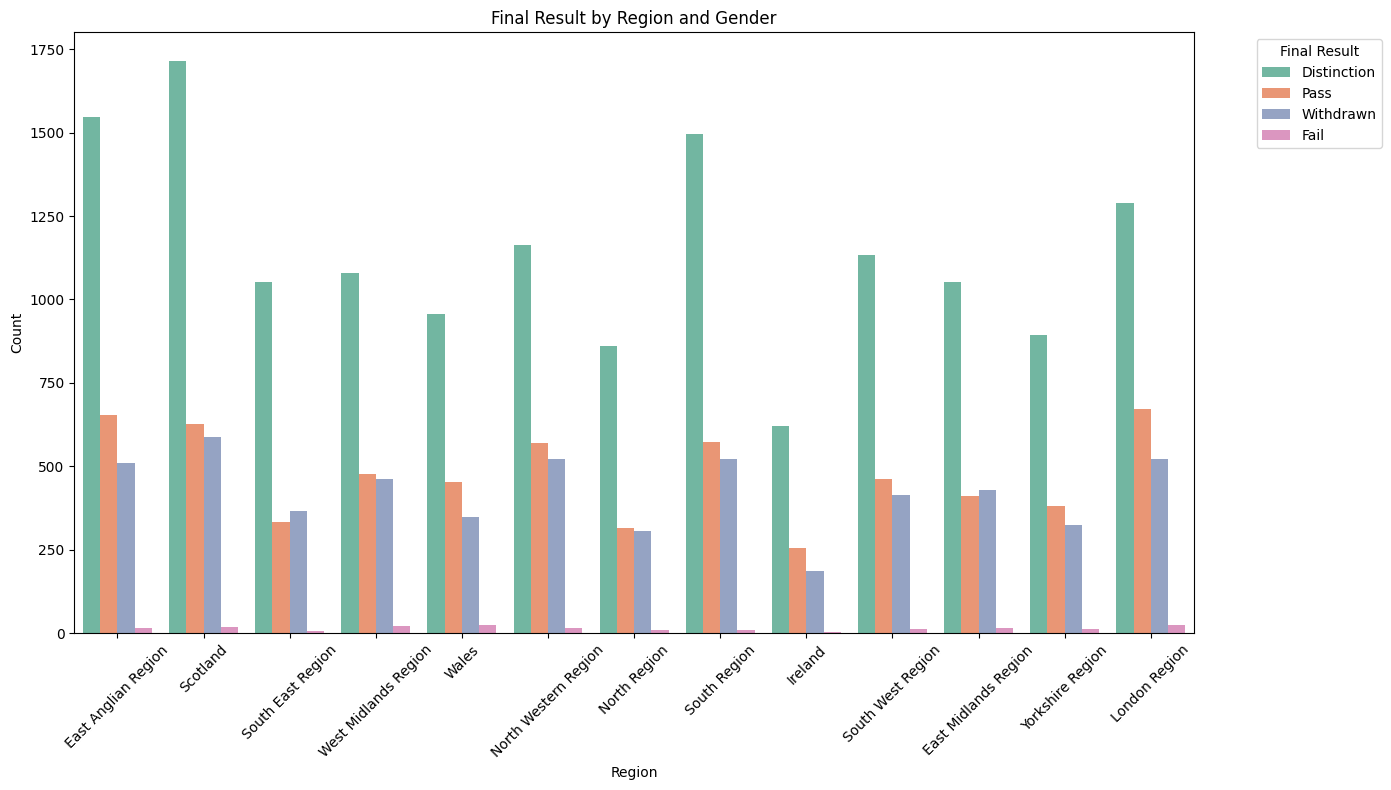

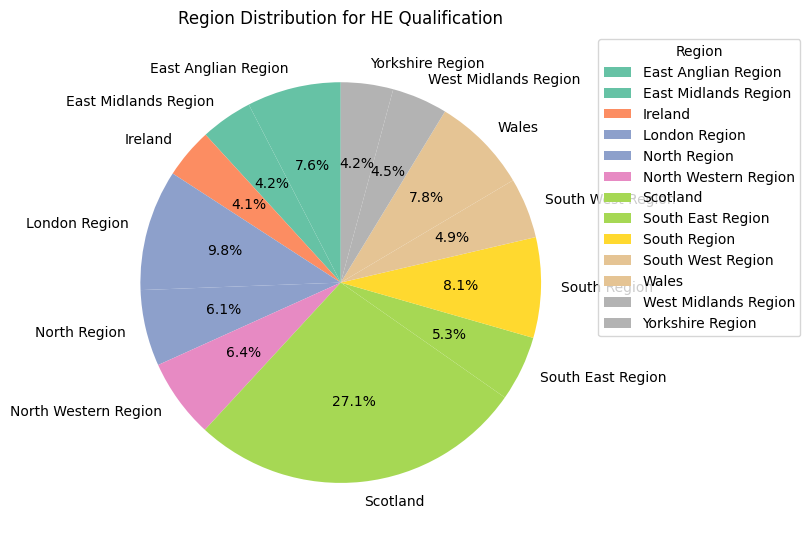

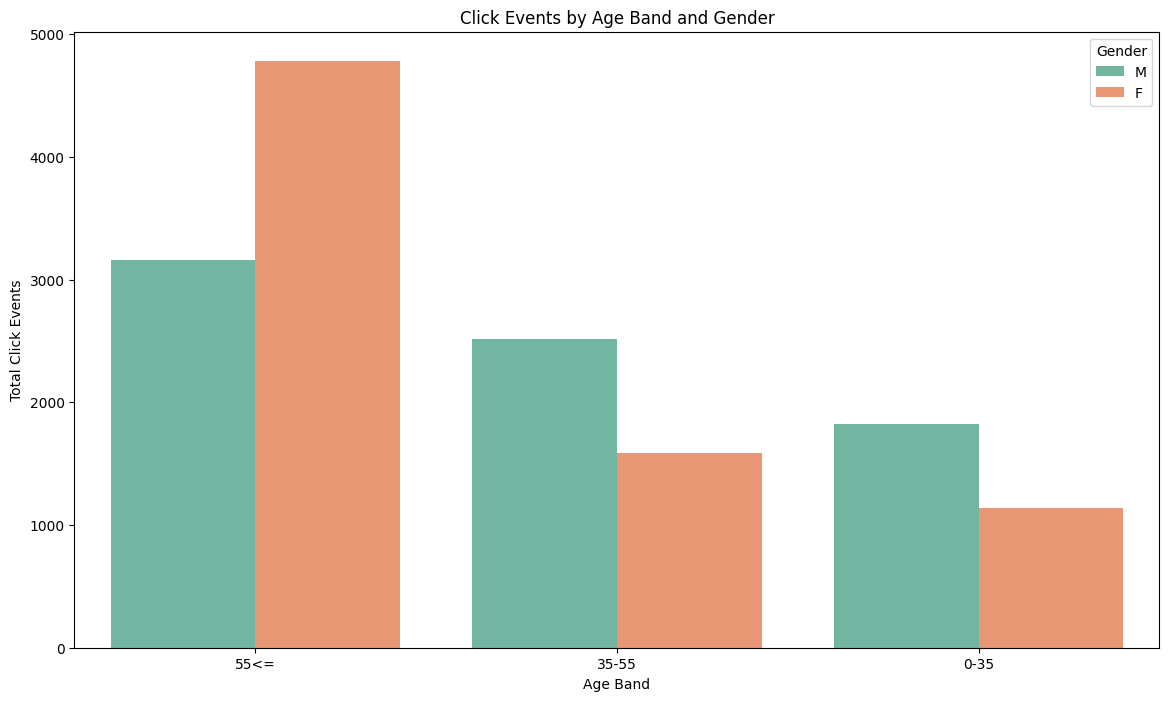

In [48]:
# Data visualization section
if not data_a.empty and not data_b.empty:
    try:
        # Plot 1: Final result by region and gender
        plt.figure(figsize=(14, 8))
        sns.countplot(x='region', hue='final_result', data=merged_data, palette='Set2', dodge=True)
        plt.title('Final Result by Region and Gender')
        plt.xlabel('Region')
        plt.ylabel('Count')
        plt.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adding legend with position
        plt.xticks(rotation=45)
        plt.tight_layout()  # To prevent clipping of legend
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating Plot 1: {e}")

    try:
        # Plot 2: Display one pie chart for the 'HE Qualification' education level by region
        filtered_data = merged_data[merged_data['highest_education'] == 'HE Qualification']
        grouped_data = filtered_data.groupby('region').size()  # Grouping by region for 'HE Qualification'
        
        # Plot a single pie chart for 'HE Qualification' by region
        plt.figure(figsize=(8, 8))
        grouped_data.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
        plt.title('Region Distribution for HE Qualification')
        plt.ylabel('')  # Hide the ylabel for better presentation
        
        # Adding legend and positioning it outside the pie chart
        plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside
        plt.tight_layout()  # Adjust the layout so everything fits
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating Plot 2: {e}")

    
    try:
        # Plot 3: Display click_events by age_band with a bar plot for each gender and region
        filtered_click_events_data = merged_data[(merged_data['age_band'].isin(['0-35', '35-55', '55<='])) & 
                                                 (merged_data['gender'].isin(['M', 'F']))]
    
        # Create a bar plot showing the sum of click_events by age_band, gender, and region
        plt.figure(figsize=(14, 8))
        sns.barplot(x='age_band', y='click_events', hue='gender', data=filtered_click_events_data, 
                    palette='Set2', errorbar=None)  # Replacing ci=None with errorbar=None
        plt.title('Click Events by Age Band and Gender')
        plt.xlabel('Age Band')
        plt.ylabel('Total Click Events')
        plt.legend(title='Gender', loc='upper right')  # Adding a legend to the bar plot
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating Plot 3: {e}")




<p style="color:red; font-weight:bold; font-size:xx-small">MARK: 65%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK:To improve, you should provide more reflection on the dataset exploration, your selected "interesting" pattern or trend and your reasons for selecting it. It is not enough to show the plots without provide an explanation to each plot and the relation to the selected trend/pattern </p>

### Task 7 - Detect and remove any outliers in the data used for your "interesting" pattern or trend

Outliers removed and filter applied. Data now has 24495 rows.


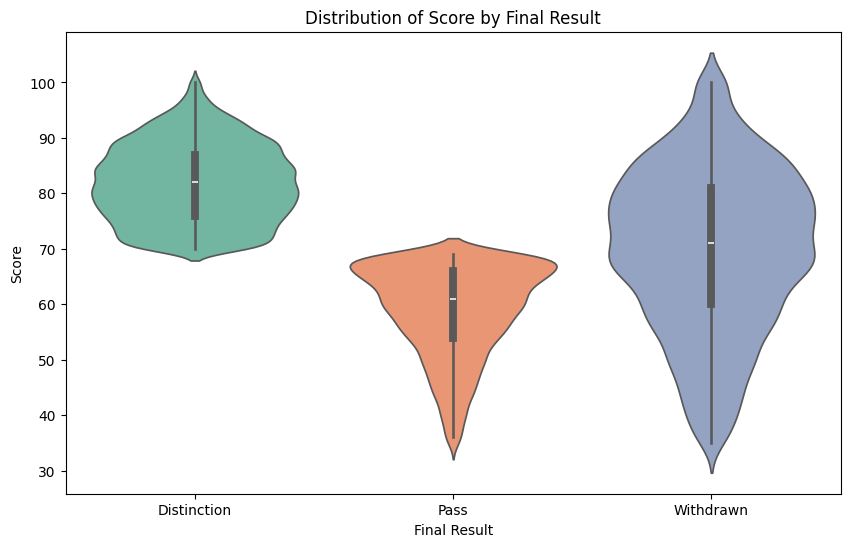

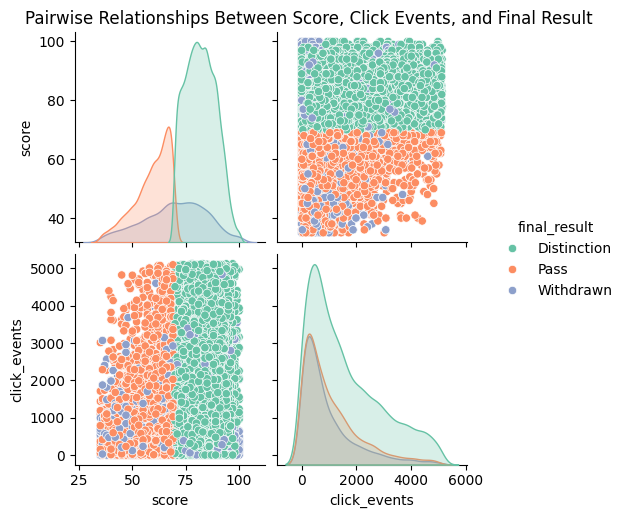

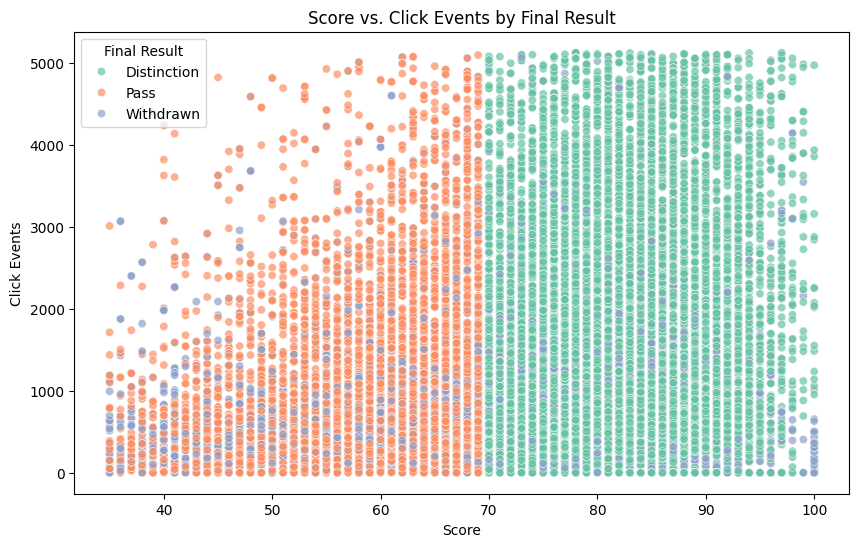

In [53]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_data is already loaded from previous steps

# Step 2: Remove Outliers using the IQR Method
def remove_outliers(df, column):
    """
    Function to detect and remove outliers using the IQR method for a given column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Outlier detection for 'score'
score_lower, score_upper = remove_outliers(merged_data, 'score')
# Outlier detection for 'click_events'
click_events_lower, click_events_upper = remove_outliers(merged_data, 'click_events')

# Filter the data to remove outliers based on 'score' and 'click_events'
merged_data_cleaned = merged_data[
    (merged_data['score'] >= score_lower) & (merged_data['score'] <= score_upper) &
    (merged_data['click_events'] >= click_events_lower) & (merged_data['click_events'] <= click_events_upper)
]

# Apply the filter_by_range condition to ensure the score and final_result are consistent
merged_data_cleaned = merged_data_cleaned[merged_data_cleaned.apply(filter_by_range, axis=1)]

print(f"Outliers removed and filter applied. Data now has {len(merged_data_cleaned)} rows.")

# Step 3: Professional Visualizations

# 1. Violin Plot: Distribution of 'score' by 'final_result'
plt.figure(figsize=(10, 6))
sns.violinplot(x='final_result', y='score', data=merged_data_cleaned, hue='final_result', palette='Set2', legend=False)
plt.title('Distribution of Score by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Score')
plt.show()

# 2. Pair Plot: Pairwise relationships between 'score', 'click_events', and 'final_result'
sns.pairplot(merged_data_cleaned[['score', 'click_events', 'final_result']], hue='final_result', palette='Set2')
plt.suptitle('Pairwise Relationships Between Score, Click Events, and Final Result', y=1.02)
plt.show()

# 3. Scatter Plot: Relationship between 'score' and 'click_events', colored by 'final_result'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='click_events', hue='final_result', data=merged_data_cleaned, palette='Set2', alpha=0.7)
plt.title('Score vs. Click Events by Final Result')
plt.xlabel('Score')
plt.ylabel('Click Events')
plt.legend(title='Final Result')
plt.show()


#### Code Explanation
1. <b>Outlier Removal</b>
- The IQR method is used to filter out extreme values for both `score` and `click_events`, this cleans the data before proceeding with any analysis.

2. <b>Filtering with `filter_by_range`</b>
- After outlier removal, apply the `filter_by_range` condition to ensure that the score and `final_result` columns are logically consistent (e.g., the `final_result` matches the corresponding `score` range).

3. <b>Visualization</b>
- `Violin Plot`: displays the distribution of scores for each final result category, providing insight into the spread and shape of the data.
- `Pair Plot`: displays the pairwise relationships between `score`, `click_events`, and `final_result`. this allows to observe how these variables interact
- `Scatter Plot`: illustrates the relationships between `score` and `click_events`, color-coded by `final_result`. helps identify any potential correlation or trends between these two features.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK:60%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK:To improve, you must include more explanation regarding the detection method used, how it works, and the any outliers detected. Also, to show and provide more explanation related to the plots before and after removing outliers. </p>

### Task 8 - Define a hypothesis to test your “interesting” pattern or trend an test your hypothesis with statistical significance level of 0.05

In [65]:
import pandas as pd
import scipy.stats as stats

# Function to perform hypothesis testing for multiple groups
def test_hypothesis(df, result_column, score_column, alpha=0.05):
    try:
        # Validate that both the result column and the score column exist in the df
        if result_column not in df.columns or score_column not in df.columns:
            raise ValueError(f"Columns '{result_column}' or '{score_column}' not found in the dataframe.")
        
        # Clean the 'result_column' if necessary 
        df[result_column] = df[result_column].str.strip().str.upper()
    
        # Check the unique values in the 'final_result' column
        print(f"Unique values in '{result_column}': {df[result_column].unique()}")
        
        # Calculate the size of scores for each unique result
        for result in df[result_column].unique():
            group = df[df[result_column] == result][score_column]
            print(f"Size of group '{result}': {len(group)}")
        
        # Perform t-tests between pairs of groups 
        result_pairs = [
            ('PASS', 'FAIL'),
            ('PASS', 'DISTINCTION'),
            ('FAIL', 'DISTINCTION'),
            ('PASS', 'WITHDRAWN'),
            ('FAIL', 'WITHDRAWN'),
            ('DISTINCTION', 'WITHDRAWN')
        ]
        
        for group1, group2 in result_pairs:
            group1_scores = df[df[result_column] == group1][score_column]
            group2_scores = df[df[result_column] == group2][score_column]
            
            # Check if both groups have enough records
            if len(group1_scores) < 3 or len(group2_scores) < 3:
                print(f"Not enough records for groups '{group1}' and '{group2}' for a reliable t-test.")
                continue

            # Perform an independent t-test 
            t_stat, p_value = stats.ttest_ind(group1_scores, group2_scores, equal_var=False)
            result = f"p-value for {group1} vs {group2} = {p_value:.4f}\n"
            if p_value < alpha:
                result += f"Reject the null hypothesis for {group1} vs {group2}. There is a significant difference in the average scores."
            else:
                result += f"Fail to reject the null hypothesis for {group1} vs {group2}. There is no significant difference in the average scores."
            
            print(result)

    except ValueError as ve:
        print(f"ValueError: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Usage
test_hypothesis(merged_data_cleaned, 'final_result', 'score')


Unique values in 'final_result': ['DISTINCTION' 'PASS' 'WITHDRAWN']
Size of group 'DISTINCTION': 13503
Size of group 'PASS': 5970
Size of group 'WITHDRAWN': 5022
Not enough records for groups 'PASS' and 'FAIL' for a reliable t-test.
p-value for PASS vs DISTINCTION = 0.0000
Reject the null hypothesis for PASS vs DISTINCTION. There is a significant difference in the average scores.
Not enough records for groups 'FAIL' and 'DISTINCTION' for a reliable t-test.
p-value for PASS vs WITHDRAWN = 0.0000
Reject the null hypothesis for PASS vs WITHDRAWN. There is a significant difference in the average scores.
Not enough records for groups 'FAIL' and 'WITHDRAWN' for a reliable t-test.
p-value for DISTINCTION vs WITHDRAWN = 0.0000
Reject the null hypothesis for DISTINCTION vs WITHDRAWN. There is a significant difference in the average scores.


#### Code Explanation
1. <b>Function Definition:</b> `test_hypothesis` tests differences in scores between groups in `final_result`.
2. <b>Validation:</b> ensures the `result_column` and `score_column` exist in the DataFrame.
3. <b>Data Cleaning:</b> strips spaces and standardizes the `result_column` to uppercase.
4. <b>Group Size:</b> prints the size of each group based on `final_result`.
5. <b>T-test:</b> compares pairs of groups (e.g., `Pass` vs `Fail`) using a t-test and checks for significant differences in scores

<p style="color:red; font-weight:bold; font-size:xx-small">MARK:75%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK:To improve, provide more explanation for your choice. You must include a detailed explanation of your findings to achieve good marks for this task.Also, write the ext of H0, H1, and  </p>